## Helper Functions

In [47]:
# Help Functions for visualization
import numpy as np
def transform_timestamps_to_be_seconds_from_process_start_time(process_start_time, all_task_timestamps):
    function_timestamps_starting_from_zero = np.array(all_task_timestamps) - process_start_time
    return function_timestamps_starting_from_zero

def separate_list_elements(list_of_lists):
    start_values = [inner_list[0] for inner_list in list_of_lists]
    start_values = np.array(start_values)
    end_values = [inner_list[1] for inner_list in list_of_lists]
    end_values = np.array(end_values)
    return start_values, end_values

from random import sample
def generate_bar_colors(number_of_threads_or_subprocesses):
    good_colors = ['firebrick', 'darkgreen', 'royalblue', 'rebeccapurple', 'dimgrey', 'teal', 'chocolate', 'darkgoldenrod']
    colors = sample(good_colors, number_of_threads_or_subprocesses)
    return colors

import matplotlib.pyplot as plt
def visualize_task_times(start_times, end_times, plot_title, colors):
    plt.barh(range(len(start_times)), end_times-start_times, left=start_times, color=colors);
    plt.grid(axis='x');
    plt.ylabel("Tasks");
    plt.xlabel("Seconds");
    plt.title(plot_title);
    plt.figure(figsize=(12, 10));
    plt.show();
    return None;    

# Multithreading and Multiprocessing

### 1. Thread Pool Executor

In [48]:
from concurrent.futures import ThreadPoolExecutor
def do_multithreading(function, iterable, number_of_threads):
    with ThreadPoolExecutor(max_workers=number_of_threads) as executor:
        responses = executor.map(function, iterable)
    return list(responses)

def visualize_multithreading_effect(number_of_threads, function_name, iterable):
    process_start_time = time() # we track time here 
    time_logs_multithreading_op = do_multithreading(function_name, iterable, number_of_threads)
    multithreading_task_timestamps = transform_timestamps_to_be_seconds_from_process_start_time(process_start_time, time_logs_multithreading_op)
    start_times, end_times = separate_list_elements(multithreading_task_timestamps)
    colors = generate_bar_colors(number_of_threads)
    visualize_task_times(start_times, end_times, f"Tasks for URL Server Responses; {number_of_threads} Thread", colors)


### 2. Process Pool Executor

In [49]:
from concurrent.futures import ProcessPoolExecutor
def do_multiprocessing(function, iterable, number_of_concurrent_processes):
    with ProcessPoolExecutor(max_workers=number_of_concurrent_processes) as executor:
        responses = executor.map(function, iterable)
    return list(responses)

from time import time
def visualize_multiprocessing_effect(number_of_concurrent_processes, function_name, iterable):
    process_start_time = time() # we track time here 
    time_logs_multiprocessing_op = do_multiprocessing(function_name, iterable, number_of_concurrent_processes)
    multiprocessing_task_timestamps = transform_timestamps_to_be_seconds_from_process_start_time(process_start_time, time_logs_multiprocessing_op)
    start_times, end_times = separate_list_elements(multiprocessing_task_timestamps)
    colors = generate_bar_colors(number_of_concurrent_processes)
    visualize_task_times(start_times, end_times, f"Tasks for URL Server Responses; {number_of_concurrent_processes} Process", colors)

### Example 1

In [50]:
twelve_urls = ['https://tu-chemnitz.de']*12
from requests import get
def get_response_time_measurements(url):
    start_time = time()
    try:
        response = get(url)
    except Exception as exception_object:
        print(f'Error with request for url: {url}')
    stop_time = time()
    return [start_time, stop_time]

### Visualize Example 1 (Thread)

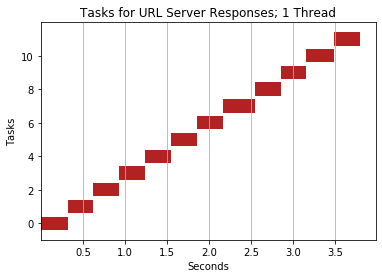

<Figure size 864x720 with 0 Axes>

In [51]:
#do_multithreading(function=get_response_time_measurements, iterable=twelve_urls, number_of_threads=1)
visualize_multithreading_effect(number_of_threads=1, #test for 1,2,3,...,12
                                function_name=get_response_time_measurements,
                                iterable=twelve_urls)

### Visualize Example 1 (Process)

In [53]:
do_multiprocessing(function=get_response_time_measurements, iterable=twelve_urls, number_of_concurrent_processes=1)
#visualize_multiprocessing_effect(number_of_concurrent_processes=1,
#                                function_name=get_response_time_measurements,
#                                iterable=twelve_urls)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.